In [1]:
import pandas as pd
import numpy as np

In [2]:
iris = pd.read_csv('iris.csv')
iris

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Utilizando Árvore de Decisão

In [3]:
X = iris.iloc[:,:4]
y = iris.iloc[:, 4]

# Vamos remover 20% do nosso conjunto de treinamento
# E usar como teste do nosso modelo k-NN
list_ids = list(range(len(y)))
ids_test = list(np.random.choice(list_ids, int(len(list_ids)*0.2), replace=False))

print(len(y), len(ids_test))
X_teste = X.iloc[ids_test]
X = X.drop(index=ids_test)
y_teste = y.iloc[ids_test]
y = y.drop(index=ids_test)
print(len(y), len(y_teste))

150 30
120 30


In [4]:
from sklearn.tree import DecisionTreeClassifier

arvore = DecisionTreeClassifier(criterion="entropy")
arvore.fit(X, y)
preds = arvore.predict(np.array(X_teste))
for p, gt in zip(preds,y_teste):
    print(f'{p}\t\t{gt}:    \t{p==gt}')
acertos = sum(preds == y_teste)
print('Resultado: ',acertos/len(y_teste)*100,'%')
print('==================')

print(arvore.score(X_teste, y_teste))

Iris-virginica		Iris-virginica:    	True
Iris-setosa		Iris-setosa:    	True
Iris-virginica		Iris-virginica:    	True
Iris-setosa		Iris-setosa:    	True
Iris-versicolor		Iris-versicolor:    	True
Iris-virginica		Iris-virginica:    	True
Iris-versicolor		Iris-versicolor:    	True
Iris-setosa		Iris-setosa:    	True
Iris-virginica		Iris-virginica:    	True
Iris-virginica		Iris-virginica:    	True
Iris-virginica		Iris-virginica:    	True
Iris-setosa		Iris-setosa:    	True
Iris-versicolor		Iris-versicolor:    	True
Iris-virginica		Iris-virginica:    	True
Iris-setosa		Iris-setosa:    	True
Iris-setosa		Iris-setosa:    	True
Iris-setosa		Iris-setosa:    	True
Iris-setosa		Iris-setosa:    	True
Iris-virginica		Iris-virginica:    	True
Iris-versicolor		Iris-versicolor:    	True
Iris-virginica		Iris-virginica:    	True
Iris-versicolor		Iris-versicolor:    	True
Iris-virginica		Iris-virginica:    	True
Iris-virginica		Iris-virginica:    	True
Iris-virginica		Iris-virginica:    	True
Iris-virginic

C:\Users\jrivo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [5]:
from sklearn.tree import export_text
tree_rules = export_text(arvore, feature_names=list(X.columns))

In [6]:
print(tree_rules)

|---  petal_width <= 0.75
|   |--- class: Iris-setosa
|---  petal_width >  0.75
|   |---  petal_length <= 4.75
|   |   |---  petal_width <= 1.65
|   |   |   |--- class: Iris-versicolor
|   |   |---  petal_width >  1.65
|   |   |   |--- class: Iris-virginica
|   |---  petal_length >  4.75
|   |   |---  petal_length <= 5.15
|   |   |   |---  petal_width <= 1.75
|   |   |   |   |---  sepal_width <= 2.35
|   |   |   |   |   |--- class: Iris-virginica
|   |   |   |   |---  sepal_width >  2.35
|   |   |   |   |   |---  petal_length <= 5.05
|   |   |   |   |   |   |--- class: Iris-versicolor
|   |   |   |   |   |---  petal_length >  5.05
|   |   |   |   |   |   |---  sepal_width <= 2.75
|   |   |   |   |   |   |   |--- class: Iris-versicolor
|   |   |   |   |   |   |---  sepal_width >  2.75
|   |   |   |   |   |   |   |--- class: Iris-virginica
|   |   |   |---  petal_width >  1.75
|   |   |   |   |---  sepal_width <= 3.10
|   |   |   |   |   |--- class: Iris-virginica
|   |   |   |   |---  s

In [7]:
y

0         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
5         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name:  class, Length: 120, dtype: object

In [8]:
np.unique(np.array(y))

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

<class 'sklearn.tree._classes.DecisionTreeClassifier'>


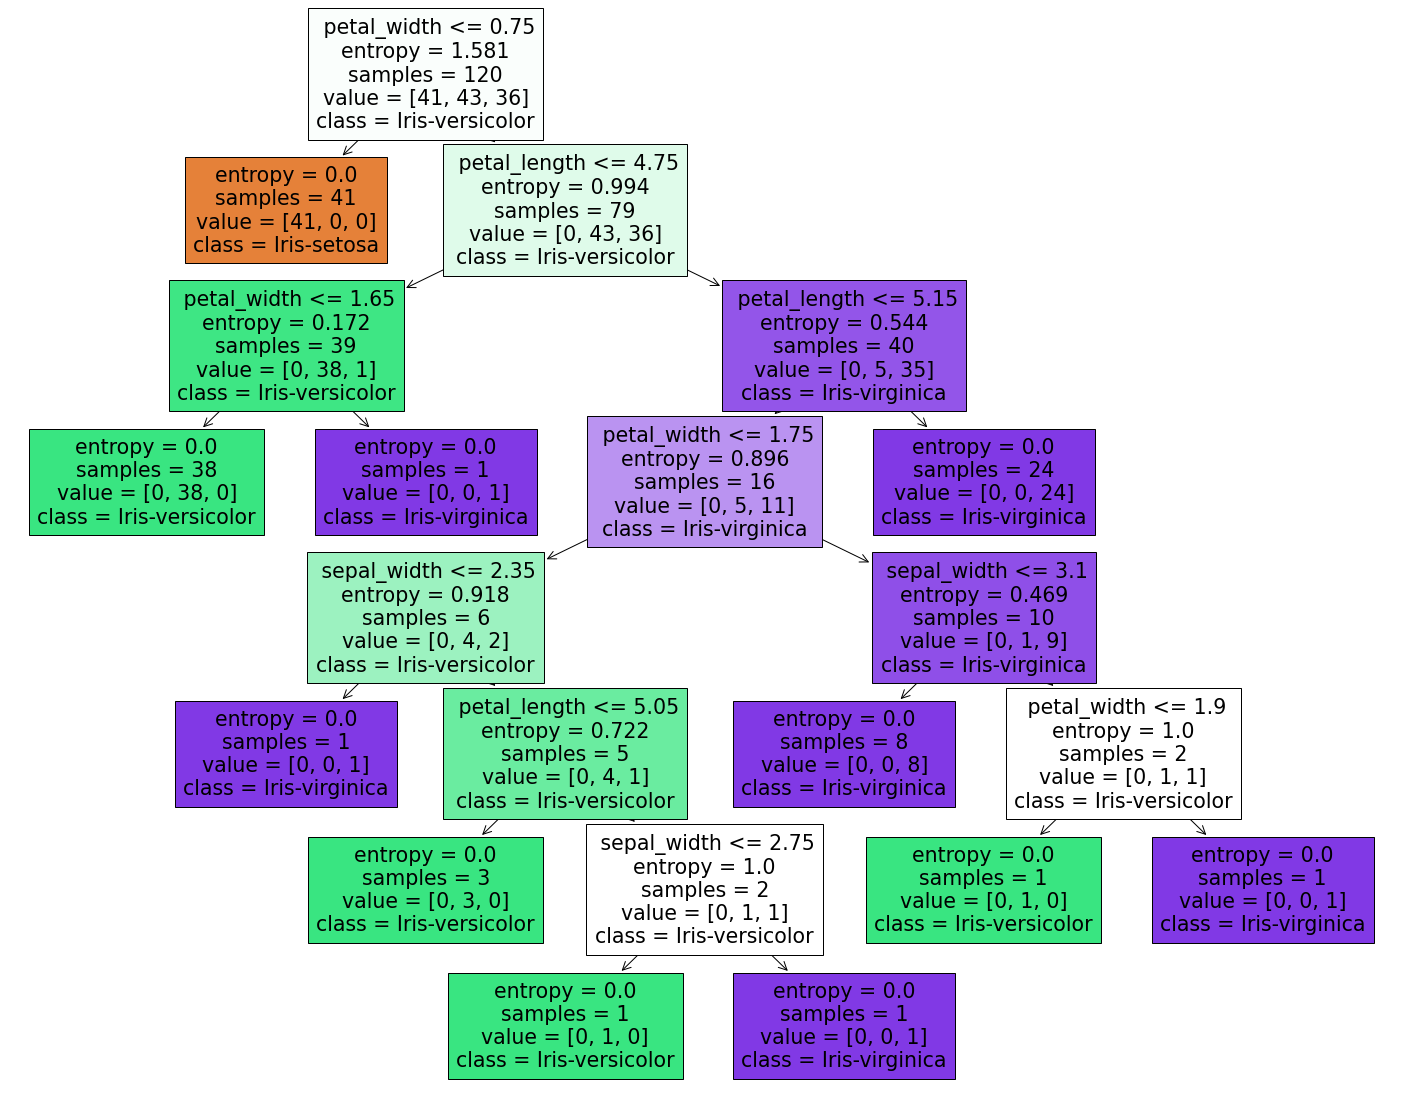

In [11]:
import matplotlib.pyplot as plt
from sklearn import tree
fig = plt.figure(figsize=(25,20))
print(type(arvore))
_ = tree.plot_tree(arvore, 
                   feature_names=X.columns,  
                   class_names=np.unique(np.array(y)),
                   filled=True)
iris = iris.dropna()

In [10]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X, y)

preds = clf.predict(np.array(X_teste))
for p, gt in zip(preds,y_teste):
    print(f'{p}\t\t{gt}:    \t{p==gt}')
acertos = sum(preds == y_teste)
print('Resultado: ',acertos/len(y_teste)*100,'%')
print('==================')

print(clf.score(X_teste, y_teste))

Iris-virginica		Iris-virginica:    	True
Iris-setosa		Iris-setosa:    	True
Iris-virginica		Iris-virginica:    	True
Iris-setosa		Iris-setosa:    	True
Iris-versicolor		Iris-versicolor:    	True
Iris-virginica		Iris-virginica:    	True
Iris-versicolor		Iris-versicolor:    	True
Iris-setosa		Iris-setosa:    	True
Iris-virginica		Iris-virginica:    	True
Iris-virginica		Iris-virginica:    	True
Iris-virginica		Iris-virginica:    	True
Iris-setosa		Iris-setosa:    	True
Iris-versicolor		Iris-versicolor:    	True
Iris-virginica		Iris-virginica:    	True
Iris-setosa		Iris-setosa:    	True
Iris-setosa		Iris-setosa:    	True
Iris-setosa		Iris-setosa:    	True
Iris-setosa		Iris-setosa:    	True
Iris-virginica		Iris-virginica:    	True
Iris-versicolor		Iris-versicolor:    	True
Iris-virginica		Iris-virginica:    	True
Iris-versicolor		Iris-versicolor:    	True
Iris-virginica		Iris-virginica:    	True
Iris-virginica		Iris-virginica:    	True
Iris-virginica		Iris-virginica:    	True
Iris-virginic

C:\Users\jrivo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
